# Coherence Analysis

In [1]:
# import libraries
import os  # for chdir, getcwd, path.basename, path.exists
import hvplot.xarray
import pandas as pd # for DatetimeIndex 
import rioxarray
import numpy as np #for log10, mean, percentile, power
import rasterio as rio
from rasterio.plot import show # plotting raster data
from rasterio.plot import show_hist #histograms of raster data

import glob # for listing files in tiff conversion function
import matplotlib.pyplot as plt # for add_subplot, axis, figure, imshow, legend, plot, set_axis_off, set_data,
                                # set_title, set_xlabel, set_ylabel, set_ylim, subplots, title, twinx

In [3]:
#!aws s3 ls s3://snowex-data/uavsar-project/UAVSAR_images/grmesa_2020_003_274_0025d/
!aws s3 ls s3://snowex-data/uavsar-project/UAVSAR_images/

2021-07-15 05:29:47  133704622 grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.cor.grd.tif
2021-07-15 05:30:05  133704622 grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.hgt.grd.tif
2021-07-15 05:30:27  267380270 grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.int.grd.tif
2021-07-15 05:30:42  133704622 grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.unw.grd.tif


In [4]:
# Change to tmp directory and download staged tutorial data
os.chdir('/tmp')

!aws s3 cp --no-progress s3://snowex-data/uavsar-project/UAVSAR_images/grmesa_2020_003_274_0025d/ .  --recursive --exclude "*" --include "*tif"

download: s3://snowex-data/uavsar-project/UAVSAR_images/grmesa_2020_003_274_0025d/grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.cor.grd.tif to ./grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.cor.grd.tif
download: s3://snowex-data/uavsar-project/UAVSAR_images/grmesa_2020_003_274_0025d/grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.hgt.grd.tif to ./grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.hgt.grd.tif
download: s3://snowex-data/uavsar-project/UAVSAR_images/grmesa_2020_003_274_0025d/grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.unw.grd.tif to ./grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.unw.grd.tif
download: s3://snowex-data/uavsar-project/UAVSAR_images/grmesa_2020_003_274_0025d/grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.int.grd.tif to ./grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.int.grd.tif


In [9]:
### inspect our newly created .tiffs, and create named objects for each data type. We'll use these new obects in the next step

# amplitude from the first acquisition
for amp1 in glob.glob("*amp1.grd.tif"):
    print(amp1)
    
# amplitude from the second acquisition
for amp2 in glob.glob("*amp2.grd.tif"):
    print(amp2)

# coherence
for cor in glob.glob("*cor.grd.tif"):
    print(cor)

# unwrapped phase
for unw in glob.glob("*unw.grd.tif"):
    print(unw)

# dem used in processing
for dem in glob.glob("*hgt.grd.tif"):
    print(dem)

grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.cor.grd.tif
grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.unw.grd.tif
grmesa_27416_20003-028_20013-004_0025d_s01_L090HH_01.hgt.grd.tif


In [10]:
unw_rast = rio.open(unw)
meta_data = unw_rast.profile
print(meta_data)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 7009, 'height': 4768, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(5.556e-05, 0.0, -108.30238572,
       0.0, -5.556e-05, 39.19024608), 'tiled': False, 'interleave': 'band'}


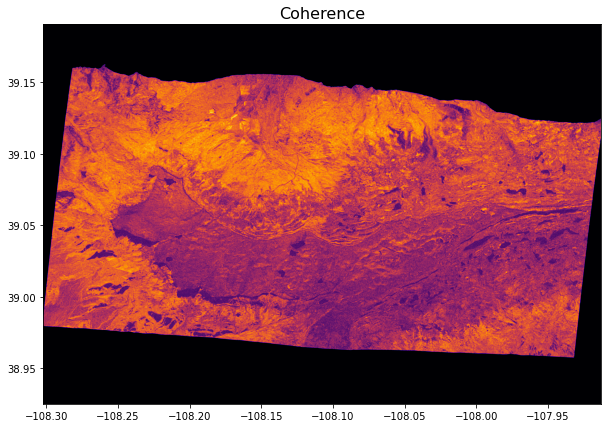

In [11]:
cor_rast = rio.open(cor)
fig, ax = plt.subplots(figsize = (10,7))
ax.set_title("Coherence",fontsize = 16);
show((cor_rast, 1), cmap = 'inferno', vmin = 0, vmax = 1);